In [ ]:
# Import Data and Pre-process

In [ ]:
data.columns

In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
#Transform the Target value into binary numbers
data['FLOODS']=np.where(data['FLOODS']=='YES',1,0)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [7]:
Cor=data.drop(['SUBDIVISION','YEAR'],axis=1).corr()['FLOODS'].reset_index().sort_values(by='FLOODS')
Cor['Abs_cor']=abs(Cor['FLOODS'])
Cor.sort_values(by='Abs_cor',ascending=False)

,index,FLOODS,Abs_cor
13,FLOODS,1.000000,1.000000
12,ANNUAL RAINFALL,0.776231,0.776231
6,JUL,0.442774,0.442774
5,JUN,0.442531,0.442531
8,SEP,0.376385,0.376385
7,AUG,0.286690,0.286690
4,MAY,0.242813,0.242813
10,NOV,0.238852,0.238852
0,JAN,0.145313,0.145313
2,MAR,0.086739,0.086739


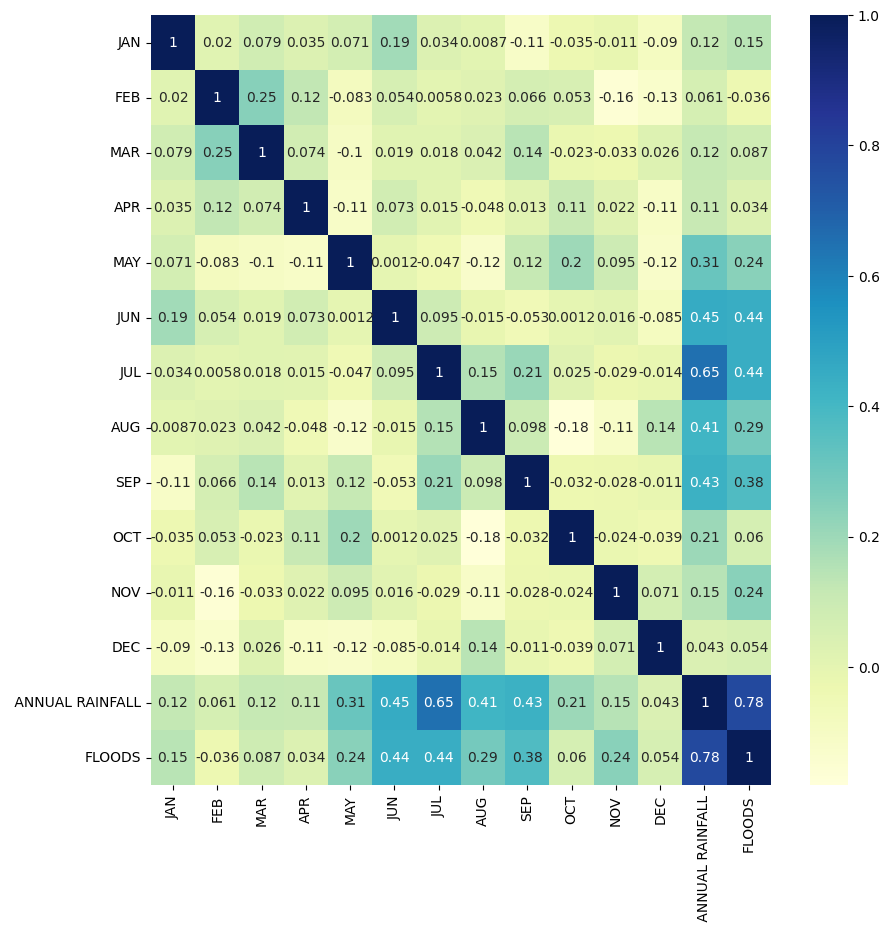

In [8]:
import seaborn as sns
# import modules 
import matplotlib.pyplot as plt 
#print(data.drop(['SUBDIVISION','YEAR'],axis=1).corr())

fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(data.drop(['SUBDIVISION','YEAR'],axis=1).corr(), cmap="YlGnBu", annot=True,ax=ax)
plt.show()

- Floods is highly correlated with Annual Rainfall
- Annual Rainfall is highly correlated with May-Sept rainfall

**2. Trend & distribution**

<Axes: xlabel=' ANNUAL RAINFALL', ylabel='Count'>

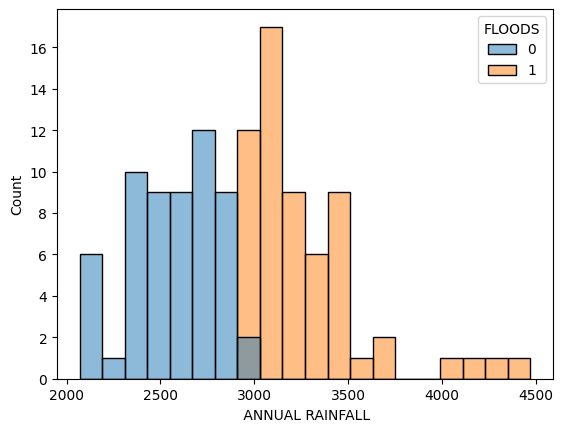

In [9]:
sns.histplot(data=data,x=' ANNUAL RAINFALL',bins=20,hue='FLOODS')

# FEATURE SELECTION

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
X= data.iloc[:,1:14]  # all features
Y= data.iloc[:,-1]   #target output (floods)

In [20]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

In [21]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [22]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
4,APR,2.498771
2,FEB,2.571626
0,YEAR,2.866463
12,DEC,11.609546
10,OCT,12.650485
3,MAR,21.696518
1,JAN,48.413088
11,NOV,284.674615
5,MAY,656.812145
8,AUG,739.975818


# Build Model and make predictions

In [11]:
data_train=data.drop(['SUBDIVISION','FLOODS',' ANNUAL RAINFALL'],axis=1)
data_label=data['FLOODS']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_label, test_size=0.33, random_state=42)

In [13]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
def models(X_train,y_train):
    model=[]
    F1=[]
    ROC_RUC=[]
    CV=[]
    k_folds = KFold(n_splits = 5)
    # KNN
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    model.append('KNN')
    F1.append(f1_score(y_test,knn.predict(X_test)))
    ROC_RUC.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
    CV.append(cross_val_score(knn,data_train , data_label, cv = k_folds).mean())
    
    #Logistic Regression
    Log_model=linear_model.LogisticRegression()
    Log_model.fit(X_train,y_train)
    
    model.append('Logistic Regression')
    F1.append(f1_score(y_test,Log_model.predict(X_test)))
    ROC_RUC.append(roc_auc_score(y_test, Log_model.predict_proba(X_test)[:, 1]))
    CV.append(cross_val_score(Log_model,data_train , data_label, cv = k_folds).mean())
    
    #Random Forest
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X_train,y_train)
    
    model.append('Random Forest')
    F1.append(f1_score(y_test,rf.predict(X_test)))
    ROC_RUC.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
    CV.append(cross_val_score(rf,data_train , data_label, cv = k_folds).mean())
    
    #Other models
              
    table=pd.DataFrame({'Model':model,'F1_score':F1,'ROC_RUC':ROC_RUC,'CV':CV})
    return table

In [15]:
 models(X_train,y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

,Model,F1_score,ROC_RUC,CV
0,KNN,0.918919,0.946053,0.855797
1,Logistic Regression,0.947368,0.997368,0.957609
2,Random Forest,0.894737,0.942105,0.780072


Logistic Regression performed the best in this data. Random Forest & KNN looks like having a bit of overfitting issue as CV score is much lower than other score.We will use Logistic Regression in such problem.

# Other Findings: 

What if we only have a few month of data and we wanna see possibility of floods of this year

In [ ]:

data_q1=data[['YEAR', 'JAN', 'FEB', 'MAR','FLOODS']]
data_q2=data[['YEAR', 'APR', 'MAY', 'JUN','FLOODS']]
data_q3=data[['YEAR', 'JUL', 'AUG', 'SEP','FLOODS']]
data_half=data[['YEAR', 'JUL', 'AUG', 'SEP','APR', 'MAY', 'JUN','FLOODS']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_half.drop('FLOODS',axis=1), data_label, test_size=0.33, random_state=42)
models(X_train,y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_q1.drop('FLOODS',axis=1), data_label, test_size=0.33, random_state=42)
models(X_train,y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_q2.drop('FLOODS',axis=1), data_label, test_size=0.33, random_state=42) 
models(X_train,y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_q3.drop('FLOODS',axis=1), data_label, test_size=0.33, random_state=42) 
models(X_train,y_train)

# Conclusion

- Logistic Regression is the most suitable model in this problem

If we only have a few month of data and we wanna see possibility of floods of this year: 

- Accuracy went down but still pretty good for first half year data (0.78 F1)
- if I use only 1 quarter data, then the F1 score have largely goes down for logistic Regression, ( from heat map the floods is more correlated to May - Sept) 
- if I use the 2nd quarter data, F1 score is about 0.8. It is pretty good already. 
- if I use the 3rd quarter data, F1 score is about 0.6 and RUC is about 0.83. 

Overally, if data is not complete. I believe the 2nd quarter data is most predictive. From the VIF score we see , each month data are actually correlated with each other, which explains the finding above. A good explaination I can imagine is 2nd quarter is raining season and can be a sign of the rain for whole year as the clouds and whether might share similar trend for the whole year.